In [104]:
#dependencies
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

In [108]:
player_data = 'player_data.csv'
player_data = pd.read_csv(player_data)
player_data = player_data.rename(columns={'name': 'Player'})

players = 'Players.csv'
players = pd.read_csv(players)

complete_player_data = pd.merge(player_data, players,
                                 how='left', on=["Player","Player"])

complete_player_data.sort_values("Player", inplace = True) 

complete_player_data.drop_duplicates(subset ="Player", 
                     keep = False, inplace = True) 

clean_player_data = complete_player_data.dropna(axis = 0, how ='any')

# print("Old data frame length:", len(complete_player_data), "\nNew data frame length:",  
#        len(clean_player_data), "\nNumber of rows with at least 1 NA value: ", 
#        (len(complete_player_data)-len(clean_player_data)))

In [110]:
new_columns_1 = [
    'Player',
    'height_y',
    'weight_y',
]

clean_height_weight_df = clean_player_data[new_columns_1]
clean_height_weight_df

,Player,height_y,weight_y
474,Aaron Brooks,183.0,73.0
1451,Aaron Gordon,206.0,99.0
1489,Aaron Gray,213.0,122.0
1666,Aaron Harrison,198.0,95.0
1945,Aaron James,203.0,95.0
...,...,...,...
2339,Zach LaVine,196.0,85.0
3312,Zach Randolph,206.0,117.0
1,Zaid Abdul-Aziz,206.0,106.0
4531,Zeke Zawoluk,201.0,97.0


In [116]:
stats_data = 'Seasons_Stats.csv'
stats_data = pd.read_csv(stats_data)

PG_stats_df = stats_data[stats_data['Pos']=='PG']
print(f"There are {len(PG_stats_df)} Point Guards with avaliable height and weight data.")

There are 4648 Point Guards with avaliable height and weight data.


In [24]:
# list(stats_data.columns)

In [117]:
columns = [
    'Player',
    'Pos',
    'PTS',
    'BLK'
]

PG_df = PG_stats_df[columns]
PG_df

,Player,Pos,PTS,BLK
11,Nelson Bobb,PG,242.0,NaN
32,Al Cervi*,PG,573.0,NaN
49,Bob Davies*,PG,895.0,NaN
108,Red Holzman*,PG,556.0,NaN
114,Ralph Johnson,PG,590.0,NaN
...,...,...,...,...
24661,Deron Williams,PG,701.0,8.0
24662,Deron Williams,PG,522.0,2.0
24663,Deron Williams,PG,179.0,6.0
24681,Delon Wright,PG,150.0,11.0


In [89]:
PG_PTS_height_weight_data = pd.merge(clean_height_weight_df,PG_df,
                                 how='left', on=["Player","Player"])

PG_PTS_height_weight_data

,Player,height_y,weight_y,Pos,PTS,BLK
0,Aaron Brooks,183.0,73.0,PG,264.0,5.0
1,Aaron Brooks,183.0,73.0,PG,894.0,8.0
2,Aaron Brooks,183.0,73.0,PG,1604.0,14.0
3,Aaron Brooks,183.0,73.0,PG,634.0,3.0
4,Aaron Brooks,183.0,73.0,PG,394.0,2.0
...,...,...,...,...,...,...
6202,Zach LaVine,196.0,85.0,PG,778.0,10.0
6203,Zach Randolph,206.0,117.0,NaN,NaN,NaN
6204,Zaid Abdul-Aziz,206.0,106.0,NaN,NaN,NaN
6205,Zeke Zawoluk,201.0,97.0,NaN,NaN,NaN


In [90]:
PG_player_height = PG_PTS_height_weight_data.groupby(['Player','Pos']).mean()["height_y"]
PG_player_height

Player           Pos
Aaron Brooks     PG     183.0
Aaron McKie      PG     196.0
Aaron Miles      PG     185.0
Acie Law         PG     190.0
Adonis Jordan    PG     180.0
                        ...  
Winston Garland  PG     188.0
Yogi Ferrell     PG     183.0
Yuta Tabuse      PG     175.0
Zabian Dowdell   PG     190.0
Zach LaVine      PG     196.0
Name: height_y, Length: 671, dtype: float64

In [91]:
PG_player_weight = PG_PTS_height_weight_data.groupby(['Player','Pos']).mean()["weight_y"]
PG_player_weight

Player           Pos
Aaron Brooks     PG     73.0
Aaron McKie      PG     94.0
Aaron Miles      PG     79.0
Acie Law         PG     88.0
Adonis Jordan    PG     77.0
                        ... 
Winston Garland  PG     77.0
Yogi Ferrell     PG     81.0
Yuta Tabuse      PG     74.0
Zabian Dowdell   PG     86.0
Zach LaVine      PG     85.0
Name: weight_y, Length: 671, dtype: float64

In [92]:
PG_PTS_count = PG_PTS_height_weight_data.groupby(['Player','Pos']).sum()["PTS"]
PG_PTS_count

PG_BLK_count = PG_PTS_height_weight_data.groupby(['Player','Pos']).sum()["BLK"]
PG_BLK_count

Player           Pos
Aaron Brooks     PG     113.0
Aaron McKie      PG       0.0
Aaron Miles      PG       1.0
Acie Law         PG       5.0
Adonis Jordan    PG       1.0
                        ...  
Winston Garland  PG      90.0
Yogi Ferrell     PG      18.0
Yuta Tabuse      PG       0.0
Zabian Dowdell   PG       2.0
Zach LaVine      PG      10.0
Name: BLK, Length: 671, dtype: float64

In [93]:
PG_PTS_summary = pd.DataFrame({"Total PTS": PG_PTS_count,
                            "Height": PG_player_height,
                               "Weight": PG_player_weight,
                               "Total BLKS": PG_BLK_count
                          })
PG_PTS_summary

,,Total PTS,Height,Weight,Total BLKS
Player,Pos,,,,
Aaron Brooks,PG,7839.0,183.0,73.0,113.0
Aaron McKie,PG,7.0,196.0,94.0,0.0
Aaron Miles,PG,16.0,185.0,79.0,1.0
Acie Law,PG,1053.0,190.0,88.0,5.0
Adonis Jordan,PG,21.0,180.0,77.0,1.0
...,...,...,...,...,...
Winston Garland,PG,5373.0,188.0,77.0,90.0
Yogi Ferrell,PG,924.0,183.0,81.0,18.0
Yuta Tabuse,PG,7.0,175.0,74.0,0.0


The r-squared value is: 0.00076895791269398
The correlation between both factors is: -0.03


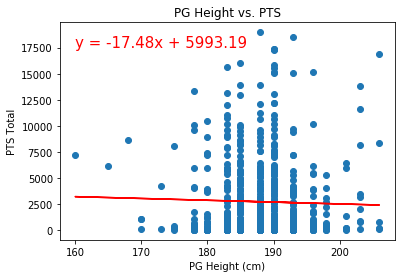

In [94]:
correlation = round(st.pearsonr(PG_player_height,PG_PTS_count)[0],2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(PG_player_height, PG_PTS_count)
regress_values = PG_player_height * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(PG_player_height,PG_PTS_count)
plt.plot(PG_player_height,regress_values,color="red")
plt.annotate(line_eq,(160,17500),fontsize=15,color="red")
plt.title("PG Height vs. PTS")
plt.xlabel('PG Height (cm)')
plt.ylabel('PTS Total')
print(f"The r-squared value is: {rvalue**2}")
print(f"The correlation between both factors is: {correlation}")
plt.show()

The r-squared value is: 0.00014482712721450094
The correlation between both factors is: -0.01


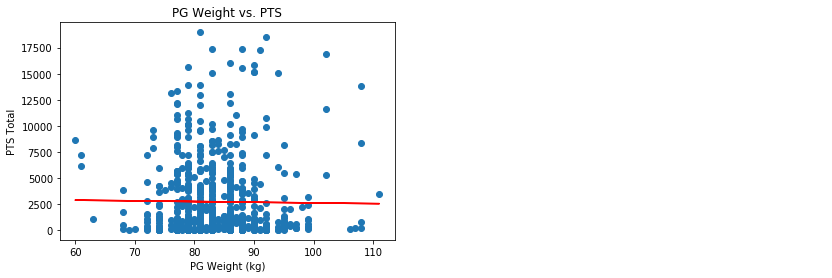

In [97]:
correlation = round(st.pearsonr(PG_player_weight,PG_PTS_count)[0],2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(PG_player_weight, PG_PTS_count)
regress_values = PG_player_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(PG_player_weight,PG_PTS_count)
plt.plot(PG_player_weight,regress_values,color="red")
plt.annotate(line_eq,(160,17500),fontsize=15,color="red")
plt.title("PG Weight vs. PTS")
plt.xlabel('PG Weight (kg)')
plt.ylabel('PTS Total')
print(f"The r-squared value is: {rvalue**2}")
print(f"The correlation between both factors is: {correlation}")
plt.show()

The r-squared value is: 0.010018692656342698
The correlation between both factors is: 0.1


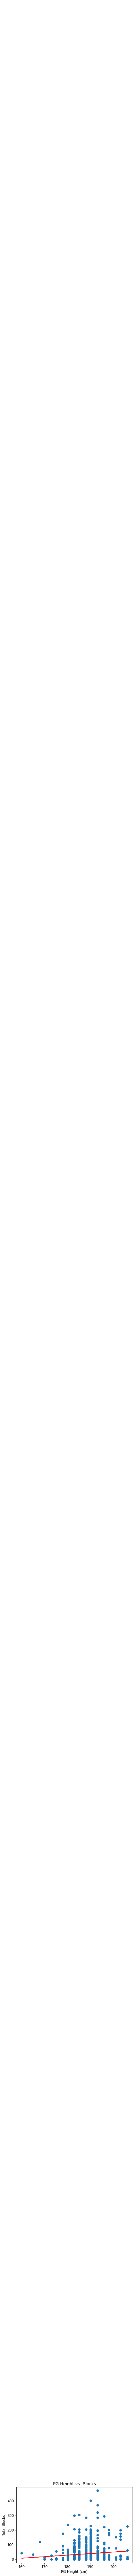

In [105]:
correlation = round(st.pearsonr(PG_player_height,PG_BLK_count)[0],2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(PG_player_height, PG_BLK_count)
regress_values = PG_player_height * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(PG_player_height,PG_BLK_count)
plt.plot(PG_player_height,regress_values,color="red")
plt.annotate(line_eq,(160,17500),fontsize=15,color="red")
plt.title("PG Height vs. Blocks")
plt.xlabel('PG Height (cm)')
plt.ylabel('Total Blocks')
print(f"The r-squared value is: {rvalue**2}")
print(f"The correlation between both factors is: {correlation}")
plt.show()

The r-squared value is: 0.006893951456135524
The correlation between both factors is: 0.08


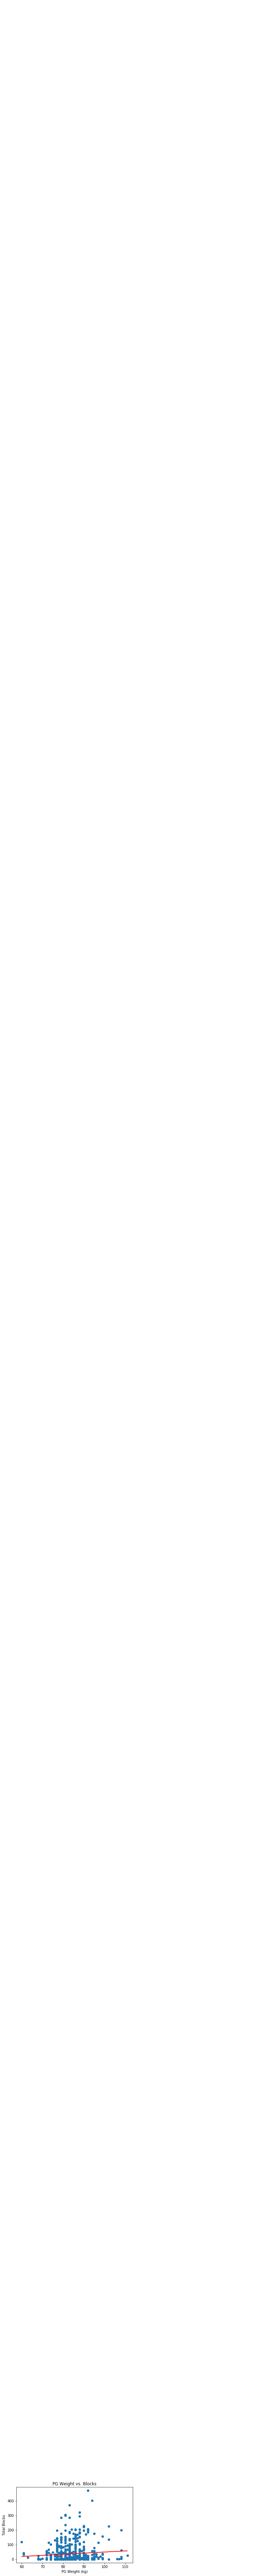

In [106]:
correlation = round(st.pearsonr(PG_player_weight,PG_BLK_count)[0],2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(PG_player_weight, PG_BLK_count)
regress_values = PG_player_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(PG_player_weight,PG_BLK_count)
plt.plot(PG_player_weight,regress_values,color="red")
plt.annotate(line_eq,(160,17500),fontsize=15,color="red")
plt.title("PG Weight vs. Blocks")
plt.xlabel('PG Weight (kg)')
plt.ylabel('Total Blocks')
print(f"The r-squared value is: {rvalue**2}")
print(f"The correlation between both factors is: {correlation}")
plt.show()